In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/ntbach254/Big-Data-Project-2025/refs/heads/main/BigData_Project/BigData_Project/Data/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(url)
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [3]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
encoder = LabelEncoder()

df["hypertension"] = df["hypertension"].map({0: "No", 1: "Yes"})
df["heart_disease"] = df["heart_disease"].map({0: "No", 1: "Yes"})
df["stroke"] = df["stroke"].map({0: "No", 1: "Yes"})

print(df)

         id  gender   age hypertension heart_disease ever_married  \
0      9046    Male  67.0           No           Yes          Yes   
1     51676  Female  61.0           No            No          Yes   
2     31112    Male  80.0           No           Yes          Yes   
3     60182  Female  49.0           No            No          Yes   
4      1665  Female  79.0          Yes            No          Yes   
...     ...     ...   ...          ...           ...          ...   
5105  18234  Female  80.0          Yes            No          Yes   
5106  44873  Female  81.0           No            No          Yes   
5107  19723  Female  35.0           No            No          Yes   
5108  37544    Male  51.0           No            No          Yes   
5109  44679  Female  44.0           No            No          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-

In [4]:
distinct_ids = df['id'].nunique()
print(f"Number of distinct IDs: {distinct_ids}")

Number of distinct IDs: 5110


In [5]:
df = df.drop('id', axis=1)
print(df.head())


   gender   age hypertension heart_disease ever_married      work_type  \
0    Male  67.0           No           Yes          Yes        Private   
1  Female  61.0           No            No          Yes  Self-employed   
2    Male  80.0           No           Yes          Yes        Private   
3  Female  49.0           No            No          Yes        Private   
4  Female  79.0          Yes            No          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status stroke  
0          Urban             228.69  36.6  formerly smoked    Yes  
1          Rural             202.21   NaN     never smoked    Yes  
2          Rural             105.92  32.5     never smoked    Yes  
3          Urban             171.23  34.4           smokes    Yes  
4          Rural             174.12  24.0     never smoked    Yes  


In [6]:
analyzed_nominal_attributes= df.select_dtypes(include=['object']).describe()
analyzed_nominal_attributes

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,No,No,Yes,Private,Urban,never smoked,No
freq,2994,4612,4834,3353,2925,2596,1892,4861


In [7]:
# Show the descriptive statistics of all numeric values
analyzed_numeric_attributes= df.select_dtypes(include=['number']).describe()
analyzed_numeric_attributes

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


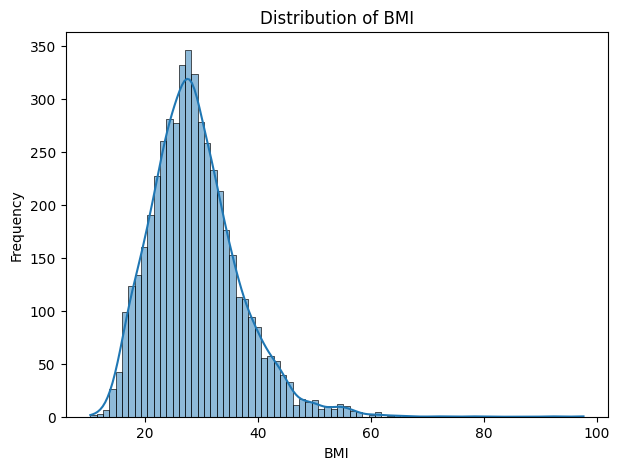

In [8]:
plt.figure(figsize=(7, 5))
sns.histplot(df['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [9]:
# bmi data is right-skewed distributed so we will fill na values with median value
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.1,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,Yes,No,Yes,Private,Urban,83.75,28.1,never smoked,No
5106,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
5107,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No
5108,Male,51.0,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,No


In [10]:
# Convert age to integer
df['age'] = df['age'].astype(int)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61,No,No,Yes,Self-employed,Rural,202.21,28.1,never smoked,Yes
2,Male,80,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,Yes,No,Yes,Private,Urban,83.75,28.1,never smoked,No
5106,Female,81,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
5107,Female,35,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No
5108,Male,51,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,No


In [11]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and print outlier rows
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print("Outlier Rows:")
print(outliers)

# Count the number of outliers
num_outliers = outliers.shape[0]
print("\nNumber of Outliers:", num_outliers)

print(f'Age range: {lower_bound} - {upper_bound}')


Outlier Rows:
Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []

Number of Outliers: 0
Age range: -29.0 - 115.0


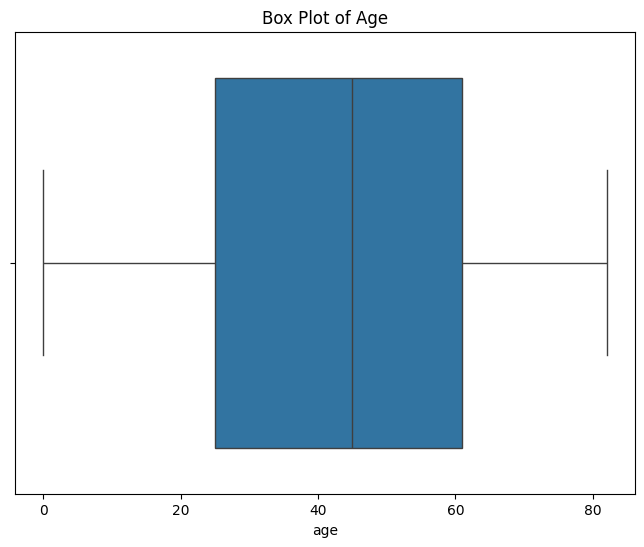

In [12]:
# prompt: draw box plot of age

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age')
plt.show()


In [13]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

# Identify and print outlier rows
outliers = df[(df['avg_glucose_level'] < lower_bound) | (df['avg_glucose_level'] > upper_bound)]
print("Outlier Rows:")
print(outliers)

# Count the number of outliers
num_outliers = outliers.shape[0]
print("\nNumber of Outliers:", num_outliers)
print(f'avg_glucose_level range: {lower_bound} - {upper_bound}')

21.977500000000006 169.35750000000002
Outlier Rows:
      gender  age hypertension heart_disease ever_married      work_type  \
0       Male   67           No           Yes          Yes        Private   
1     Female   61           No            No          Yes  Self-employed   
3     Female   49           No            No          Yes        Private   
4     Female   79          Yes            No          Yes  Self-employed   
5       Male   81           No            No          Yes        Private   
...      ...  ...          ...           ...          ...            ...   
5061    Male   41           No            No          Yes        Private   
5062  Female   82           No            No          Yes  Self-employed   
5063    Male   39           No            No          Yes        Private   
5064    Male   70           No            No          Yes  Self-employed   
5076  Female   34           No            No          Yes        Private   

     Residence_type  avg_glucose_le

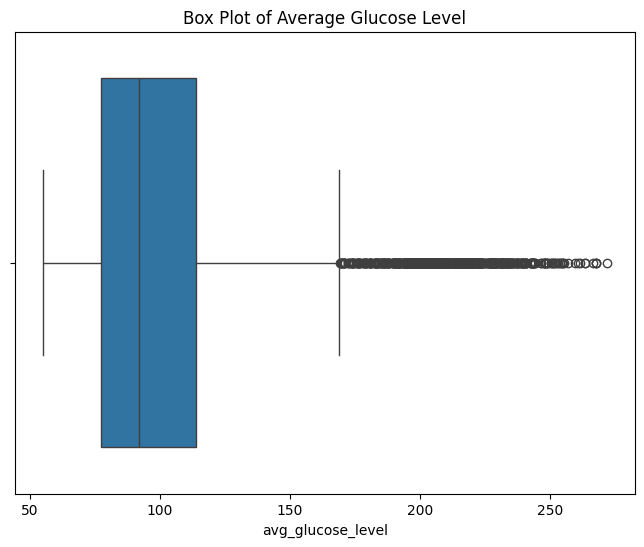

In [14]:
# prompt: box plot of avg_glucose_level

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['avg_glucose_level'], orient='h')
plt.title('Box Plot of Average Glucose Level')
plt.show()


In [15]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and print outlier rows
outliers = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

# Count the number of outliers

print("\nNumber of Outliers:", num_outliers)
print(f'bmi range: {lower_bound} - {upper_bound}')


Number of Outliers: 627
bmi range: 10.300000000000006 - 46.29999999999999


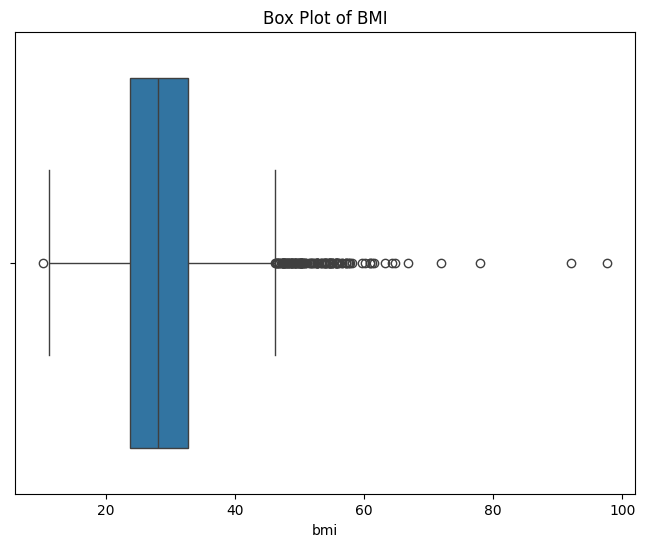

In [16]:
# prompt: box plot of bmi

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bmi'])
plt.title('Box Plot of BMI')
plt.show()


In [17]:
# Filling missing values in 'smoking_status' with its mode
df['smoking_status'] = df['smoking_status'].replace('Unknown', df['smoking_status'].mode()[0])
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61,No,No,Yes,Self-employed,Rural,202.21,28.1,never smoked,Yes
2,Male,80,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,Yes,No,Yes,Private,Urban,83.75,28.1,never smoked,No
5106,Female,81,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
5107,Female,35,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No
5108,Male,51,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,No


In [18]:
analyzed_nominal_attributes2= df.select_dtypes(include=['object']).describe()
analyzed_nominal_attributes2

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,3,2
top,Female,No,No,Yes,Private,Urban,never smoked,No
freq,2994,4612,4834,3353,2925,2596,3436,4861


In [19]:
#Show descriptive statistics after filling all NA
analyzed_numeric_attributes2= df.select_dtypes(include=['number']).describe()
analyzed_numeric_attributes2

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.215264,106.147677,28.862035
std,22.633866,45.283560,7.699562
min,0.000000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


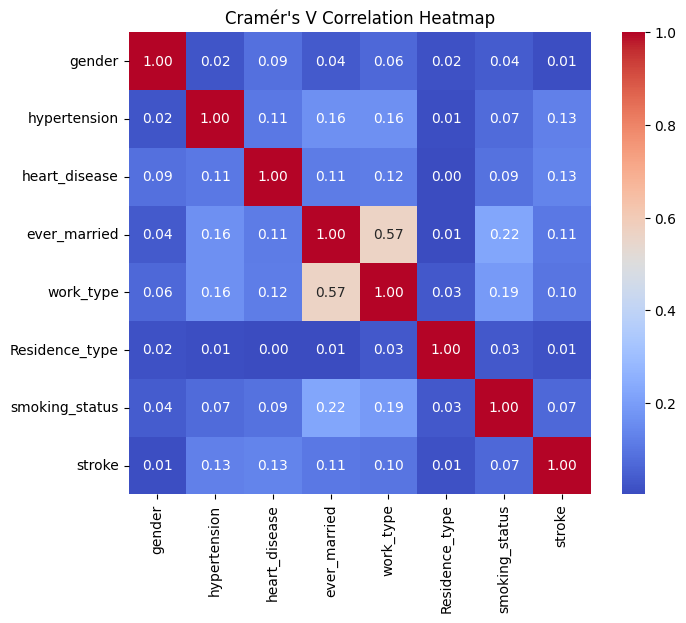

In [20]:
from scipy.stats import chi2_contingency
#Correlation matrix for categorical variables
def cramers_v(var1, var2):
    contingency_table = pd.crosstab(var1, var2)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

# Load dataset
# Compute Cramér's V for all categorical pairs
categorical_columns = ['gender', 'hypertension', 'heart_disease','ever_married','work_type',
                       'Residence_type', 'smoking_status', 'stroke']
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert to numeric for plotting
correlation_matrix = correlation_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Cramér's V Correlation Heatmap")
plt.show()

In [21]:
#Find columns which have many unique values to exclude them
high_card_cols = [col for col in df.select_dtypes(include='object') if df[col].nunique() > (50/100 * len(df))]
print("High cardinality columns:", high_card_cols)

High cardinality columns: []


In [22]:
#USe p-value to see high cardinality attributes impact to the target variable
variables = ['ever_married', 'hypertension', 'heart_disease','gender','work_type','Residence_type','smoking_status']
alpha = 0.01  # Level of significance

# Loop through each variable and test significance
for var in variables:
    contingency_table = pd.crosstab(df[var], df['stroke'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < alpha:
        print(f"{var} has a significant relationship with the target (p = {p:.4f})")
    else:
        print(f"{var} has no significant relationship with the target (p = {p:.4f})")


ever_married has a significant relationship with the target (p = 0.0000)
hypertension has a significant relationship with the target (p = 0.0000)
heart_disease has a significant relationship with the target (p = 0.0000)
gender has no significant relationship with the target (p = 0.7895)
work_type has a significant relationship with the target (p = 0.0000)
Residence_type has no significant relationship with the target (p = 0.2983)
smoking_status has a significant relationship with the target (p = 0.0000)


In [23]:
# Use correlation ratio to find the correlation between numeric variables and nominal variable("Stroke")
def correlation_ratio(categories, values):
    categories = pd.Categorical(categories)
    unique_categories = categories.categories
    overall_mean = values.mean()
    numerator = 0
    denominator = 0

    for cat in unique_categories:
        cat_values = values[categories == cat]
        numerator += len(cat_values) * (cat_values.mean() - overall_mean) ** 2
        denominator += ((cat_values - overall_mean) ** 2).sum()

    return np.sqrt(numerator / denominator) if denominator != 0 else 0

# Compute correlation ratio for all numeric attributes compared to "Stroke"
numeric_columns = df.select_dtypes(include=[np.number]).columns
results = {}

for col in numeric_columns:
    results[col] = correlation_ratio(df["stroke"], df[col])

# Display the results
for col, corr in results.items():
    print(f"Correlation between 'Stroke' and '{col}': {corr:.2f}")

Correlation between 'Stroke' and 'age': 0.25
Correlation between 'Stroke' and 'avg_glucose_level': 0.13
Correlation between 'Stroke' and 'bmi': 0.04


## Selected columns: hypertension, heart_disease, age, avg_glucose_level

In [24]:
# Specify the columns to keep
columns_to_keep = ['hypertension', 'heart_disease', 'age', 'avg_glucose_level', 'stroke']

# Drop all other columns
new_df = df[columns_to_keep]

# Print the updated dataframe to verify
print(new_df.head())

  hypertension heart_disease  age  avg_glucose_level stroke
0           No           Yes   67             228.69    Yes
1           No            No   61             202.21    Yes
2           No           Yes   80             105.92    Yes
3           No            No   49             171.23    Yes
4          Yes            No   79             174.12    Yes


In [25]:
new_df.to_csv("Healthcare-stroke-data after preprocess.csv", index=False)
new_df

,hypertension,heart_disease,age,avg_glucose_level,stroke
0,No,Yes,67,228.69,Yes
1,No,No,61,202.21,Yes
2,No,Yes,80,105.92,Yes
3,No,No,49,171.23,Yes
4,Yes,No,79,174.12,Yes
...,...,...,...,...,...
5105,Yes,No,80,83.75,No
5106,No,No,81,125.20,No
5107,No,No,35,82.99,No
5108,No,No,51,166.29,No


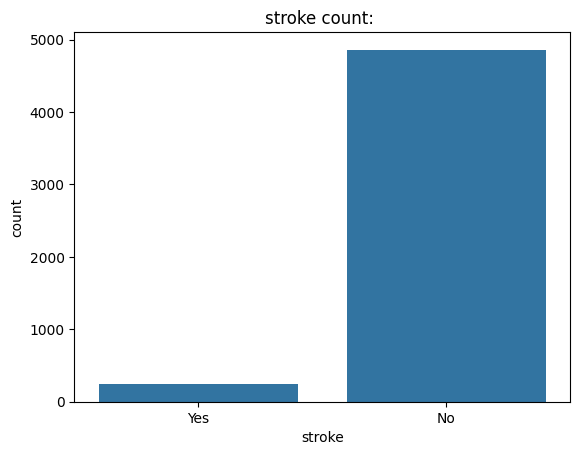

In [26]:
# Visualizing survival count
sns.countplot(x='stroke',data=new_df)
plt.title('stroke count: ')
plt.show()

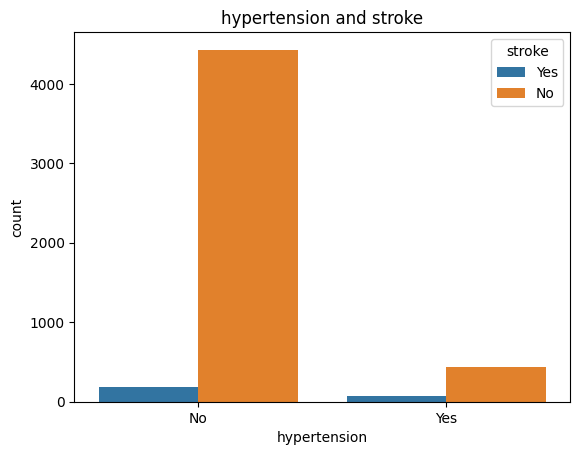

In [27]:
sns.countplot(x='hypertension', data=new_df, hue='stroke')
plt.title('hypertension and stroke')
plt.show()

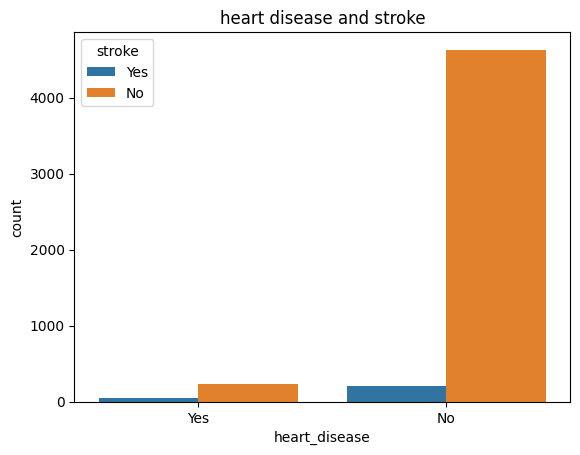

In [28]:
sns.countplot(x='heart_disease', data=new_df, hue='stroke')
plt.title('heart disease and stroke')
plt.show()

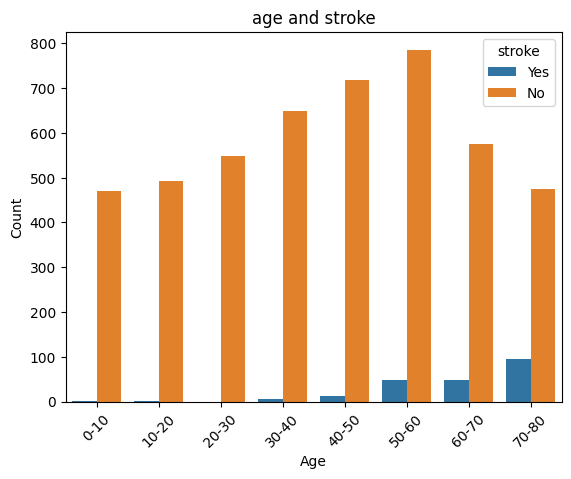

In [29]:
# stroke by age
bins = np.arange(0, 81, 10)
labels = [f'{i}-{i+10}' for i in bins[:-1]]
sns.countplot(
    x=pd.cut(new_df['age'], bins=bins, labels=labels, right=False),
    hue='stroke',
    data=new_df
)
plt.title('age and stroke')
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



<ipython-input-30-330e8b487bb9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['glucose_group'] = pd.cut(new_df['avg_glucose_level'], bins=bins, labels=labels, include_lowest=True)
<ipython-input-30-330e8b487bb9>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_by_glucose = new_df.groupby(['glucose_group', 'stroke'])['stroke'].count().reset_index(name='count')


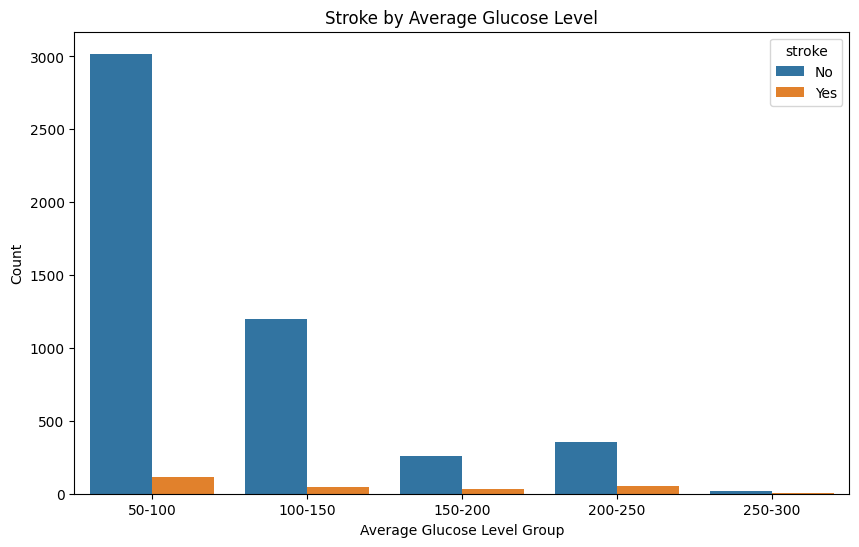

In [30]:
bins = [50, 100, 150, 200, 250, 300]
labels = ['50-100', '100-150', '150-200', '200-250', '250-300']

new_df['glucose_group'] = pd.cut(new_df['avg_glucose_level'], bins=bins, labels=labels, include_lowest=True)

stroke_by_glucose = new_df.groupby(['glucose_group', 'stroke'])['stroke'].count().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='glucose_group', y='count', hue='stroke', data=stroke_by_glucose)
plt.title('Stroke by Average Glucose Level')
plt.xlabel('Average Glucose Level Group')
plt.ylabel('Count')
plt.show()